In [23]:
import librosa
import librosa.display
import IPython.display as ipd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np

DB_EPS = 1e-6
EPS = 1e-9

In [24]:
import os

def get_files(path):
  ret = []
  for root, _, files in os.walk(path, topdown=False):
    for file in files:
      ret.append(os.path.join(root,file))
  return ret

In [25]:
directory = '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie'
tones = {tone : {'dir' : directory + '/utrenia-glas' + str(tone) + '-macarie/Inregistrari', 'files' : None} for tone in list(range(1, 8 + 1))}

In [26]:
tones

{1: {'dir': '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas1-macarie/Inregistrari',
  'files': None},
 2: {'dir': '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas2-macarie/Inregistrari',
  'files': None},
 3: {'dir': '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas3-macarie/Inregistrari',
  'files': None},
 4: {'dir': '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas4-macarie/Inregistrari',
  'files': None},
 5: {'dir': '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas5-macarie/Inregistrari',
  'files': None},
 6: {'dir': '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas6-macarie/Inregistrari',
  'files': None},
 7: {'dir': '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas7-macarie/Inregistrari',
  'files': None},
 8: {'

In [27]:
for tone in tones.keys():
  tones[tone]['files'] = get_files(tones[tone]['dir'])
tones[1]['files']

['/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas1-macarie/Inregistrari/1. 9 Ceea ce eşti mai cinstită.m4a',
 '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas1-macarie/Inregistrari/1.2 Troparele.m4a',
 '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas1-macarie/Inregistrari/1. 15 Preabinecuvântată eşti.m4a',
 '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas1-macarie/Inregistrari/1.6 Antifoanele.m4a',
 '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas1-macarie/Inregistrari/1.7 Prochimenul.m4a',
 '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas1-macarie/Inregistrari/1.12 Stihira 2 Laude.m4a',
 '/content/drive/MyDrive/psaltica_nepsis_ch/utrenia_8_glasuri_ierom_macarie/utrenia-glas1-macarie/Inregistrari/1.14 Stihira 4 Laude.m4a',
 '/content/drive/MyDrive/psa

In [113]:
NUMBER_FFT = 2048
HOP_LENGTH = 512
NUMBER_MELS = 128

def debug(curr, b, e):
  for x in curr[b:e]:
    for elem in x:
      print(elem, end=',')
    print('')
  pass

def plot_lms(lms_, sr_):
  plt.figure(figsize=(30, 10))
  librosa.display.specshow(lms_, 
                          x_axis="time",
                          y_axis="mel", 
                          sr=sr_)
  plt.colorbar(format="%+2.f")
  plt.show()
  pass

def analyze_audio(filename):
  scale, sr = librosa.load(filename)
  
  
  
  orig_chroma = librosa.feature.chroma_stft(scale, sr=sr, n_chroma=48)
  print(orig_chroma.shape)
  #print(chroma.T[100:150])
  plt.figure(figsize=(30, 10))
  librosa.display.specshow(orig_chroma, 
                          x_axis="time",
                          y_axis="chroma")
  plt.colorbar(format="%+2.f")
  
  plt.show()
  
  chroma=np.transpose(orig_chroma).copy()

  mel_spectrogram = librosa.feature.melspectrogram(scale, sr=sr, n_mels=NUMBER_MELS)
  orig_lms = librosa.power_to_db(mel_spectrogram)
  #lms = np.transpose(orig_lms).copy()
  #print(orig_lms.shape)
  #scaler = MinMaxScaler()

  # Filter
  #lms[lms < 0] = 0
  print("before")
  #debug(lms,50,100)
  #lms = lms[~np.all(lms < DB_EPS, axis=1)]
  print("after")
  #debug(lms,50,100)
  # Scale
  #for index in range(len(lms)):
  #  min = lms[index].min()
  #  max = lms[index].max()
  #  assert max > min + EPS
  #  lms[index] = (lms[index] - min) / (max - min)
  
  # Check what `lms` looks like (audio-wise), after doing this cleaning
  
  #lms = scaler.fit_transform(lms)
  print("after scale")
  #debug(lms,50,100)

  print('simple')
  #debug(lms,0,100)
  print("diff")
  #lms_diff = np.diff(lms, axis=0)

  # Maybe also rescale the diff?
  #debug(lms_diff, 50, 100)
  mel_max = np.argmax(chroma, axis=1)
  return sr, orig_lms, orig_chroma, chroma, mel_max#orig_lms, lms, lms_diff, mel_max

In [119]:
filename=tones[1]['files'][0]
scale1, sr1 = librosa.load(filename)
tmp=scale1[500:]
ipd.Audio(data=tmp, rate=sr1)

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


AttributeError: ignored

/usr/local/lib/python3.7/dist-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


(48, 1761)


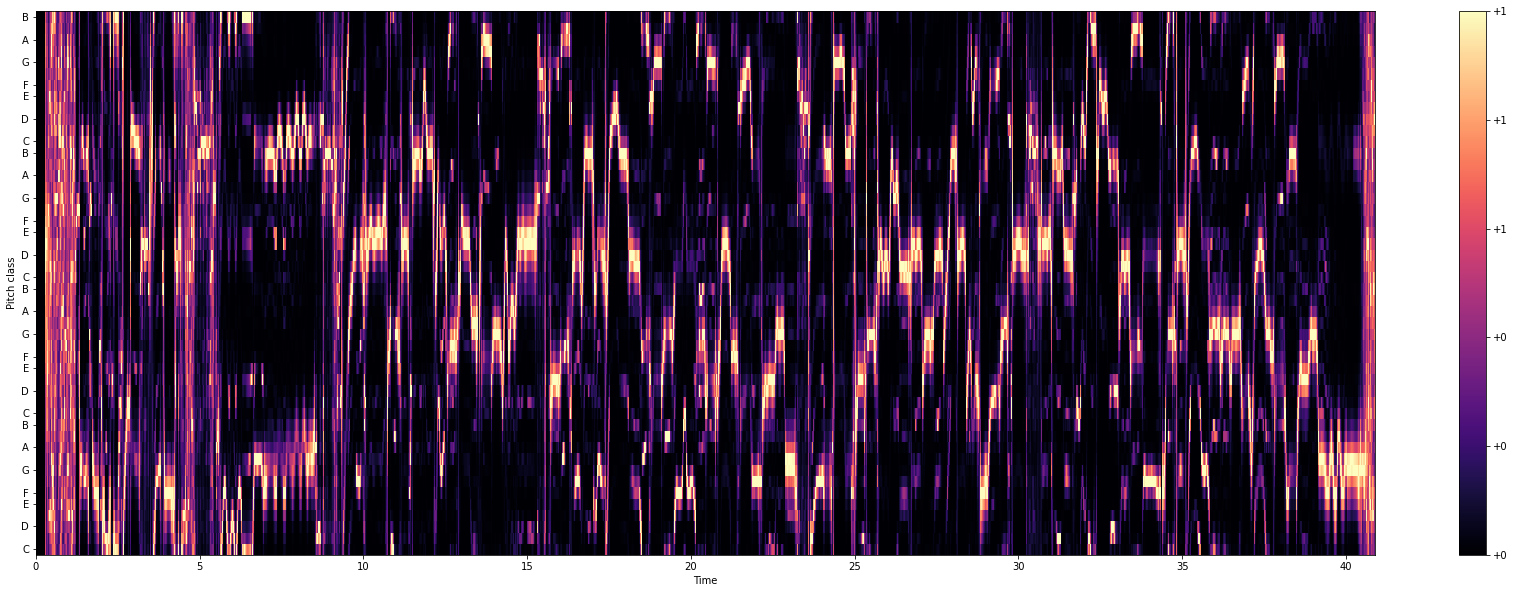

before
after
after scale
simple
diff


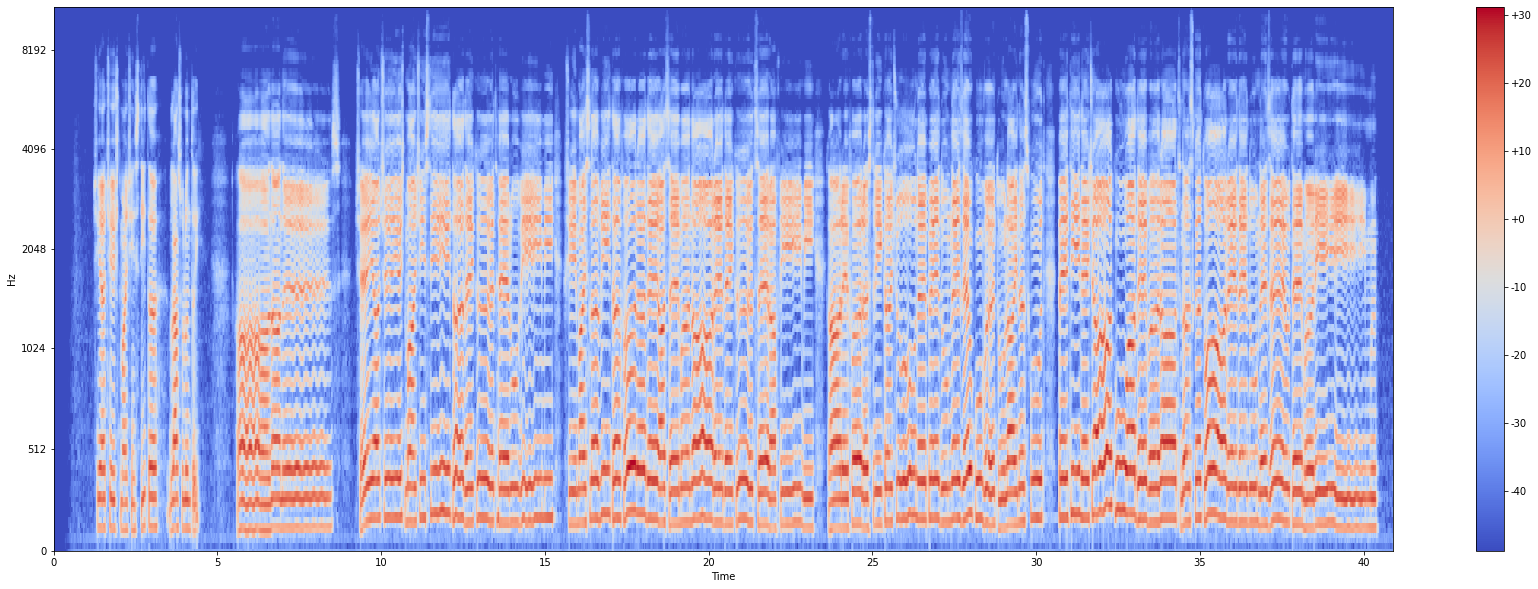

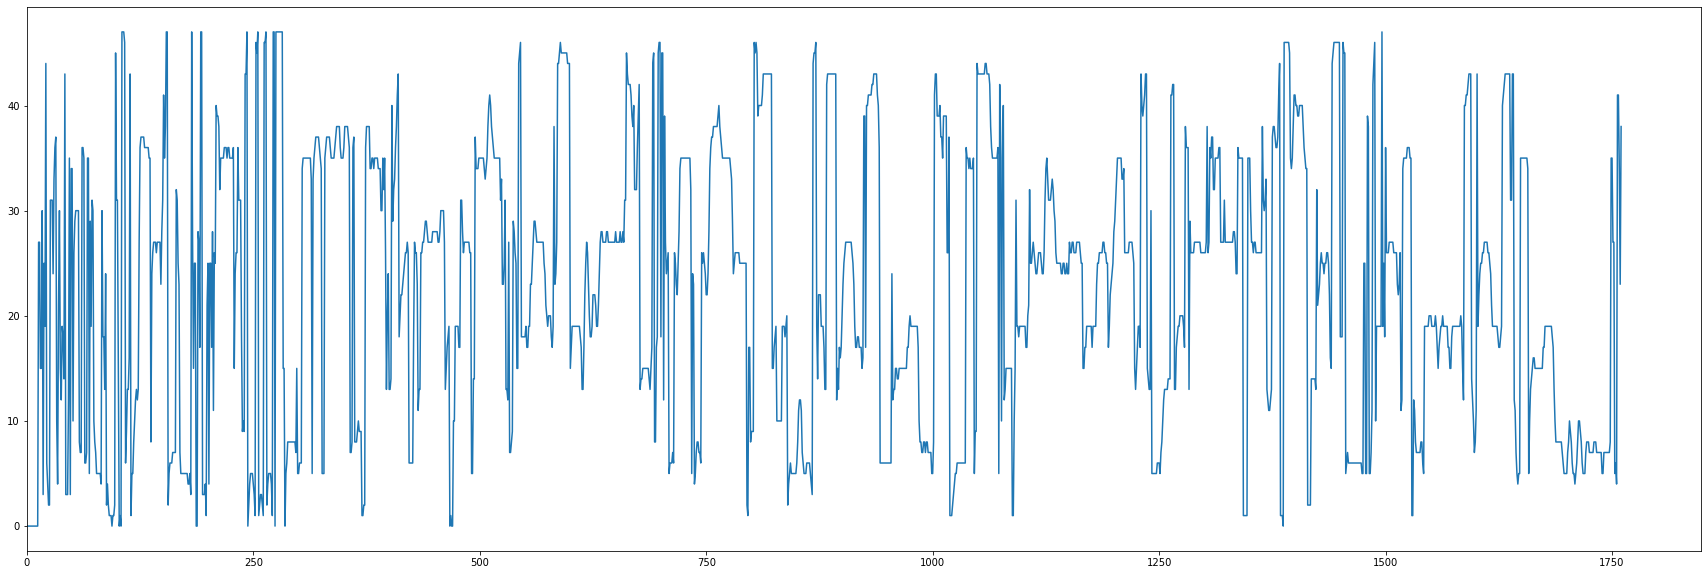

In [114]:
#sr, orig_lms, lms, lms_diff, mel_max = analyze_audio(filename)
sr, orig_lms, orig_chroma, chroma, mel_max = analyze_audio(filename)

plot_lms(orig_lms, sr)
plt.figure(figsize=(30, 10))
plt.plot(mel_max)
plt.xlim(xmin=0)
plt.show()